# **EDA,Feature Engineering, and AutoML**

In this lab, we will apply learned concepts from Day 3-4 lectures to perform data exploration, feature engineering, and autoML on a house sale dataset.

The goal of this assignment is to analyze 3 years’(2018-2020) house sales data provided by New York City (NYC) goverment and build regression model to predict house price. NYC has five boroughs, i.e., Bronx, Brooklyn, Manhattan, Queens and Staten Island. Sales of houses in each borough has been provided.


**Submission: submit via onq.** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import needed libraries. E.g., pandas, missingno, and sklearn

# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
from sklearn.neighbors import KNeighborsClassifier

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
# sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

> Task 1: **Read dataset, merge data, and  perform basic data exploration. Note, you should briefely discuss the quality of dataset (missing values, duplicate entries, etc.) Also, in task 3, you would be asked to perform prediction on house sale price, thus it would be good to consider outliers related to this prediciton task when you perform data cleaning.**

# **Task 1**

### <a>**Read dataset and Merge data**

In [ ]:
# TODO write code to perform task 1
#  merge data
import glob
import os
# merging the files
joined_list = glob.glob(os.path.join("/content/drive/MyDrive/lab2-dataset/lab2-dataset", "*.csv"))
  
# # A list of all joined files is returned
# joined_list = glob.glob(joined_files)
  
# Finally, the files are joined
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,404.00",46.00,NaN,A1,119 LENZIE STREET,NaN,...,1.00,0.00,1.00,"8,000","3,660","1,998.00",1.00,A1,"315,000",2020-10-02
1,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,407.00",6.00,NaN,A1,118 ELMBANK STREET,NaN,...,1.00,0.00,1.00,"6,200","2,580","1,975.00",1.00,A1,"450,000",2020-06-24
2,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,425.00",31.00,NaN,A1,7 SANDGAP STREET,NaN,...,1.00,0.00,1.00,"2,500","1,222","1,925.00",1.00,A2,"525,000",2020-07-02
3,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",17.00,NaN,A5,91 EAGAN AVENUE,NaN,...,1.00,0.00,1.00,"1,845","1,854","1,986.00",1.00,A5,"480,000",2020-01-14
4,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",83.00,NaN,A1,7 SEGUINE PLACE,NaN,...,1.00,0.00,1.00,"3,989","2,300","2,004.00",1.00,A1,"720,000",2020-10-15
5,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",124.00,NaN,A5,22 MAY PLACE,NaN,...,1.00,0.00,1.00,"2,475","2,495","1,986.00",1.00,A5,0,2020-09-17
6,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",145.00,NaN,A5,60 SEGUINE PLACE,NaN,...,1.00,0.00,1.00,"1,471","1,172","1,986.00",1.00,A5,"429,000",2020-11-19
7,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,211.00",16.00,NaN,A5,15 EAGAN AVENUE,NaN,...,1.00,0.00,1.00,"2,550","1,825","1,986.00",1.00,A5,"550,000",2020-10-22
8,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,211.00",52.00,NaN,A5,70 SEGUINE PLACE,NaN,...,1.00,0.00,1.00,"2,700","1,320","1,986.00",1.00,A5,"455,500",2020-07-15
9,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,212.00",46.00,NaN,A5,44 LUCY LOOP,NaN,...,1.00,0.00,1.00,"2,700","1,500","2,000.00",1.00,A5,"410,670",2020-11-10


In [ ]:
df.tail(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
277783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <a>**Basic Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277803 entries, 0 to 277802
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   BOROUGH                         230659 non-null  float64
 1   NEIGHBORHOOD                    230659 non-null  object 
 2   BUILDING CLASS CATEGORY         230659 non-null  object 
 3   TAX CLASS AT PRESENT            230386 non-null  object 
 4   BLOCK                           230659 non-null  float64
 5   LOT                             230659 non-null  float64
 6   EASE-MENT                       0 non-null       float64
 7   BUILDING CLASS AT PRESENT       230386 non-null  object 
 8   ADDRESS                         230659 non-null  object 
 9   APARTMENT NUMBER                50782 non-null   object 
 10  ZIP CODE                        230642 non-null  float64
 11  RESIDENTIAL UNITS               199734 non-null  object 
 12  COMMERCIAL UNITS

In [ ]:
df.dtypes

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
EASE-MENT                         float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

This dataset only contains object and float dtypes.

In [ ]:
#describe data
df.describe(include='object').T

,count,unique,top,freq
NEIGHBORHOOD,230659,254,FLUSHING-NORTH,6995
BUILDING CLASS CATEGORY,230659,46,01 ONE FAMILY DWELLINGS,53382
TAX CLASS AT PRESENT,230386,10,1,111132
BUILDING CLASS AT PRESENT,230386,179,D4,34271
ADDRESS,230659,207574,401 EAST 60TH STREET,97
APARTMENT NUMBER,50782,7590,4,861
RESIDENTIAL UNITS,"199,734.00",359.00,1.00,"71,917.00"
COMMERCIAL UNITS,"189,268.00",130.00,0.00,"145,262.00"
TOTAL UNITS,"201,363.00",389.00,1.00,"77,815.00"
LAND SQUARE FEET,187638,10040,0,46025


In [ ]:
#general summary of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BOROUGH,"230,659.00",3.02,1.27,1.00,2.00,3.00,4.00,5.00
BLOCK,"230,659.00","4,422.24","3,655.51",1.00,"1,366.00","3,558.00","6,574.00","16,350.00"
LOT,"230,659.00",357.50,653.04,1.00,22.00,49.00,316.00,"9,116.00"
EASE-MENT,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,"230,642.00","10,844.56",725.67,0.00,"10,307.00","11,210.00","11,358.00","11,697.00"
YEAR BUILT,"220,373.00","1,892.75",332.15,0.00,"1,921.00","1,941.00","1,970.00","2,021.00"
TAX CLASS AT TIME OF SALE,"230,659.00",1.62,0.80,1.00,1.00,1.00,2.00,4.00


<a>There are currently 230659 rows or observations in this housing dataset.

In [ ]:
#check other null value
from numpy.ma.core import array
#this return the first 20 columns have null value 
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:21]

,null_val,percent_
EASE-MENT,277803,100.00
APARTMENT NUMBER,227021,82.00
COMMERCIAL UNITS,88535,32.00
GROSS SQUARE FEET,90164,32.00
LAND SQUARE FEET,90165,32.00
TOTAL UNITS,76440,28.00
RESIDENTIAL UNITS,78069,28.00
YEAR BUILT,57430,21.00
BOROUGH,47144,17.00
SALE PRICE,47144,17.00


In [ ]:
# Drop the 'APARTMENT NUMBER','EASE-MENT' column from the data because ,it has alot of missing data greater than 80%
df.drop(["EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)

In [ ]:
df.duplicated().value_counts()

False    229893
True      47910
dtype: int64

In [ ]:
df.shape

(277803, 19)

<a>I notice that the data has missing value and it dublicated 
so i will drop duplicates 

In [ ]:
df=df.drop_duplicates()

In [ ]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,404.00",46.00,A1,119 LENZIE STREET,"10,312.00",1.00,0.00,1.00,"8,000","3,660","1,998.00",1.00,A1,"315,000",2020-10-02
1,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,407.00",6.00,A1,118 ELMBANK STREET,"10,312.00",1.00,0.00,1.00,"6,200","2,580","1,975.00",1.00,A1,"450,000",2020-06-24
2,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"5,425.00",31.00,A1,7 SANDGAP STREET,"10,312.00",1.00,0.00,1.00,"2,500","1,222","1,925.00",1.00,A2,"525,000",2020-07-02
3,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",17.00,A5,91 EAGAN AVENUE,"10,312.00",1.00,0.00,1.00,"1,845","1,854","1,986.00",1.00,A5,"480,000",2020-01-14
4,5.00,ANNADALE,01 ONE FAMILY DWELLINGS,1,"6,205.00",83.00,A1,7 SEGUINE PLACE,"10,312.00",1.00,0.00,1.00,"3,989","2,300","2,004.00",1.00,A1,"720,000",2020-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277409,3.00,WYCKOFF HEIGHTS,44 CONDO PARKING,4,"3,310.00","1,009.00",RP,"330 BLEECKER STREET, PK1","11,237.00",0.00,1.00,1.00,0,0,"2,013.00",4.00,RP,"960,000",2019-03-15
277410,3.00,WYCKOFF HEIGHTS,44 CONDO PARKING,4,"3,328.00","1,093.00",RP,"358 GROVE STREET, P32","11,237.00",0.00,1.00,1.00,0,0,NaN,4.00,RP,"618,800",2019-10-15
277411,3.00,WYCKOFF HEIGHTS,44 CONDO PARKING,4,"3,328.00","1,123.00",RP,"358 GROVE STREET, CB10","11,237.00",0.00,1.00,1.00,0,0,NaN,4.00,RP,0,2019-05-30
277412,3.00,WYCKOFF HEIGHTS,47 CONDO NON-BUSINESS STORAGE,4,"3,280.00","1,126.00",RS,"369 HARMAN STREET, S8","11,237.00",0.00,1.00,1.00,0,0,"2,009.00",4.00,RS,"725,000",2019-05-03


In [ ]:
#check other null value after drop
from numpy.ma.core import array
#this return the first 20 columns have null value 
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:19]

,null_val,percent_
GROSS SQUARE FEET,42965,19.00
LAND SQUARE FEET,42966,19.00
COMMERCIAL UNITS,41336,18.00
RESIDENTIAL UNITS,30879,13.00
TOTAL UNITS,29250,13.00
YEAR BUILT,10276,4.00
SALE PRICE,1,0.00
BUILDING CLASS AT TIME OF SALE,1,0.00
TAX CLASS AT TIME OF SALE,1,0.00
BOROUGH,1,0.00


In [ ]:
#check for numerical and categorical data 
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print('----------------------------------------------------')
print(f'Numerical Columns:  {df[numerical].columns}')
print('---------------------------------------------------')
print(f'Categorical Columns: {df[categorical].columns}')
print('---------------------------------------------------')

----------------------------------------------------
Numerical Columns:  Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')
---------------------------------------------------
Categorical Columns: Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE',
       'SALE DATE'],
      dtype='object')
---------------------------------------------------


In [ ]:
# Convert objects to categorical variables
# obj_cats =['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
#        'BUILDING CLASS AT PRESENT', 'ADDRESS', 'RESIDENTIAL UNITS',
#        'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
#        'GROSS SQUARE FEET', 'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE',
#        'SALE DATE']

# for colname in obj_cats:
#     df[colname] = df[colname].astype('category')

In [ ]:
# # Convert numeric to categorical variables
# num_cats = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'YEAR BUILT',
#        'TAX CLASS AT TIME OF SALE']

# for colname in num_cats:
#     df[colname] = df[colname].astype('category') 

In [ ]:
df.dtypes

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE         float64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [ ]:
# remove space and add _ character for ease of processing 
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
#make column names lowercase for ease of readability
df.columns= df.columns.str.lower()
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'building_class_at_present',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date'],
      dtype='object')

### <a>**DEA FOR EACH COLUMNS**

In [ ]:
#define function to check if has null value and count of them ,check duplicate ,values count and so on 
def check_col(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print('Num_of_Uniques : ', df[col].nunique())
    print('Duplicates     : ', df.duplicated(subset = None, keep = 'first').sum())
    print(df[col].value_counts(dropna = False).sort_index())

**1-BOROUGH**

In [ ]:
check_col('borough')

column name :  borough
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  1
Num_of_Uniques :  5
Duplicates     :  0
1.00    46411
2.00    22115
3.00    65168
4.00    73002
5.00    23196
NaN         1
Name: borough, dtype: int64


In [ ]:
df['borough'] = df['borough'].fillna(4.0)

In [ ]:
df['borough'].isnull().sum()

0

In [ ]:
check_col('borough')

column name :  borough
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  5
Duplicates     :  0
1.00    46411
2.00    22115
3.00    65168
4.00    73003
5.00    23196
Name: borough, dtype: int64


In [ ]:
#set numerical indicators for boroughs as type str to distinguish boroughs 
df['borough'] = df['borough'].astype(str) 
df['borough'] = df['borough'].str.replace("1.0", "Manhattan")
df['borough'] = df['borough'].str.replace("2.0", "Bronx")
df['borough'] = df['borough'].str.replace("3.0", "Brooklyn")
df['borough'] = df['borough'].str.replace("4.0", "Queens")
df['borough'] = df['borough'].str.replace("5.0", "Staten Island")

In [ ]:
# df['borough'] = df['borough'].astype('category')

In [ ]:
df['borough'].dtypes

dtype('O')

In [ ]:
df['borough']= df['borough'].str.lower()

In [ ]:
df['borough'].value_counts()

queens           73003
brooklyn         65168
manhattan        46411
staten island    23196
bronx            22115
Name: borough, dtype: int64

**2-NEIGHBORHOOD**

In [ ]:
check_col('neighborhood')

column name :  neighborhood
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  1
Num_of_Uniques :  254
Duplicates     :  0
AIRPORT JFK              1
AIRPORT LA GUARDIA      19
ALPHABET CITY          422
ANNADALE               542
ARDEN HEIGHTS          869
                      ... 
WOODLAWN               230
WOODROW                513
WOODSIDE              1024
WYCKOFF HEIGHTS        329
NaN                      1
Name: neighborhood, Length: 255, dtype: int64


In [ ]:
df['neighborhood'] = df['neighborhood'].fillna('FLUSHING-NORTH')#fill nan with most frequent value 

In [ ]:
df['neighborhood'].value_counts()

FLUSHING-NORTH              6977
UPPER EAST SIDE (59-79)     4644
UPPER WEST SIDE (59-79)     4135
UPPER EAST SIDE (79-96)     4055
BEDFORD STUYVESANT          3874
                            ... 
BLOOMFIELD                    15
BRONX PARK                    13
CITY ISLAND-PELHAM STRIP       6
FRESH KILLS                    3
AIRPORT JFK                    1
Name: neighborhood, Length: 254, dtype: int64

In [ ]:
df['neighborhood'],_= df['neighborhood'].str.split('(',1).str # seprate number and text then use number only 

In [ ]:
df['neighborhood'].value_counts()

UPPER EAST SIDE             8835
UPPER WEST SIDE             7557
FLUSHING-NORTH              6977
BEDFORD STUYVESANT          3874
BOROUGH PARK                3441
                            ... 
BLOOMFIELD                    15
BRONX PARK                    13
CITY ISLAND-PELHAM STRIP       6
FRESH KILLS                    3
AIRPORT JFK                    1
Name: neighborhood, Length: 250, dtype: int64

In [ ]:
df['neighborhood']=df['neighborhood'].str.lower()

In [ ]:
# removing '-' 
df['neighborhood'] = df['neighborhood'].str.replace("-", "") #Remove (-)

In [ ]:
check_col('neighborhood')

column name :  neighborhood
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  250
Duplicates     :  0
airport jfk              1
airport la guardia      19
alphabet city          422
annadale               542
arden heights          869
                      ... 
woodhaven             1117
woodlawn               230
woodrow                513
woodside              1024
wyckoff heights        329
Name: neighborhood, Length: 250, dtype: int64


**3-BUILDING CLASS CATEGORY**

In [ ]:
check_col('building_class_category')

column name :  building_class_category
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  1
Num_of_Uniques :  46
Duplicates     :  0
01 ONE FAMILY DWELLINGS                       53262
02 TWO FAMILY DWELLINGS                       44867
03 THREE FAMILY DWELLINGS                     12656
04 TAX CLASS 1 CONDOS                          4536
05 TAX CLASS 1 VACANT LAND                     3022
06 TAX CLASS 1 - OTHER                          465
07 RENTALS - WALKUP APARTMENTS                 8312
08 RENTALS - ELEVATOR APARTMENTS               1234
09 COOPS - WALKUP APARTMENTS                   7275
10 COOPS - ELEVATOR APARTMENTS                34777
11 SPECIAL CONDO BILLING LOTS                   195
11A CONDO-RENTALS                                27
12 CONDOS - WALKUP APARTMENTS                  2711
13 CONDOS - ELEVATOR APARTMENTS               32113
14 RENTALS - 4-10 UNIT                         1649
15 CONDOS - 2-10 UNIT RESIDENTIAL              4010
16 CONDOS -

In [ ]:
df['building_class_category'] = df['building_class_category'].fillna('01 ONE FAMILY DWELLINGS')#fill nan with most frequent value 

In [ ]:
df['building_class_category']=df['building_class_category'].str.lower()

In [ ]:
df['building_class_category'].value_counts()

01 one family dwellings                       53263
02 two family dwellings                       44867
10 coops - elevator apartments                34777
13 condos - elevator apartments               32113
03 three family dwellings                     12656
07 rentals - walkup apartments                 8312
09 coops - walkup apartments                   7275
04 tax class 1 condos                          4536
15 condos - 2-10 unit residential              4010
44 condo parking                               3508
05 tax class 1 vacant land                     3022
17 condo coops                                 2972
12 condos - walkup apartments                  2711
22 store buildings                             2576
14 rentals - 4-10 unit                         1649
29 commercial garages                          1579
08 rentals - elevator apartments               1234
31 commercial vacant land                      1058
21 office buildings                            1040
43 condo off

In [ ]:
df['building_class_category'].dtypes

dtype('O')

In [ ]:
# df['building_class_category']= df['building_class_category'].astype('category')

In [ ]:
df['building_class_category'].values

array(['01 one family dwellings', '01 one family dwellings',
       '01 one family dwellings', ..., '44 condo parking',
       '47 condo non-business storage', '47 condo non-business storage'],
      dtype=object)

In [ ]:
df['building_class_category']=df['building_class_category'].str.extract('(\d+)')

In [ ]:
df['building_class_category'].value_counts()

01    53263
02    44867
10    34777
13    32113
03    12656
07     8312
09     7275
04     4536
15     4010
44     3508
05     3022
17     2972
12     2711
22     2576
14     1649
29     1579
08     1234
31     1058
21     1040
43      951
47      930
30      849
27      521
06      465
46      462
41      391
37      356
16      259
45      253
11      222
33      156
28      150
32      135
26      123
35       91
42       80
48       63
38       59
23       49
25       45
49       45
36       41
34       31
39        6
40        2
Name: building_class_category, dtype: int64

**4-TAX CLASS AT PRESENT**

In [ ]:
df=df.dropna(subset=['tax_class_at_present'])

In [ ]:
check_col('tax_class_at_present')

column name :  tax_class_at_present
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  10
Duplicates     :  0
1     110808
1A      4054
1B      3031
1C       487
1D       434
2      81408
2A      6276
2B      1879
2C      5768
4      15474
Name: tax_class_at_present, dtype: int64


In [ ]:
df['tax_class_at_present']

0         1
1         1
2         1
3         1
4         1
         ..
277409    4
277410    4
277411    4
277412    4
277413    4
Name: tax_class_at_present, Length: 229619, dtype: object

In [ ]:
df['tax_class_at_present'].value_counts()

1     110808
2      81408
4      15474
2A      6276
2C      5768
1A      4054
1B      3031
2B      1879
1C       487
1D       434
Name: tax_class_at_present, dtype: int64

In [ ]:
df['tax_class_at_present'] =df['tax_class_at_present'].astype('category').cat.codes

In [ ]:
df['tax_class_at_present'].value_counts()

0    110808
5     81408
9     15474
6      6276
8      5768
1      4054
2      3031
7      1879
3       487
4       434
Name: tax_class_at_present, dtype: int64

**5-BLOCK**

In [ ]:
check_col('block')

column name :  block
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  13076
Duplicates     :  0
1.00          66
2.00           1
3.00          23
5.00           2
6.00           8
            ... 
16,321.00      2
16,322.00      1
16,323.00      5
16,340.00     48
16,350.00    231
Name: block, Length: 13076, dtype: int64


In [ ]:
df['block']

0        5,404.00
1        5,407.00
2        5,425.00
3        6,205.00
4        6,205.00
           ...   
277409   3,310.00
277410   3,328.00
277411   3,328.00
277412   3,280.00
277413   3,280.00
Name: block, Length: 229619, dtype: float64

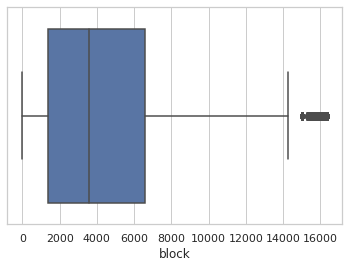

In [ ]:
sns.boxplot(x=df['block'])

**6-LOT**

In [ ]:
check_col('lot')

column name :  lot
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  3903
Duplicates     :  0
1.00        10780
2.00         2149
3.00         2322
4.00         1781
5.00         2160
            ...  
9,092.00        1
9,093.00        1
9,101.00        1
9,109.00        1
9,116.00        1
Name: lot, Length: 3903, dtype: int64


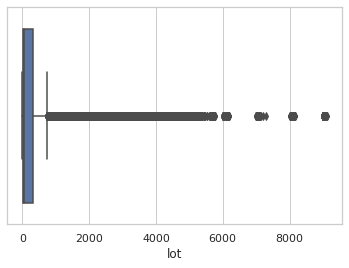

In [ ]:
sns.boxplot(x=df['lot'])

**7-BUILDING CLASS AT PRESENT**

In [ ]:
check_col('building_class_at_present')

column name :  building_class_at_present
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  179
Duplicates     :  0
A0     1340
A1    20250
A2     7880
A3     1113
A4      687
      ...  
Z2        7
Z3        7
Z4        1
Z5        2
Z9      368
Name: building_class_at_present, Length: 179, dtype: int64


In [ ]:
df['building_class_at_present'].value_counts()

D4    34197
R4    32160
A1    20250
A5    16595
B2    13926
      ...  
N4        1
HH        1
H5        1
Y3        1
M2        1
Name: building_class_at_present, Length: 179, dtype: int64

In [ ]:
df['building_class_at_present'] =df['building_class_at_present'].astype('category').cat.codes

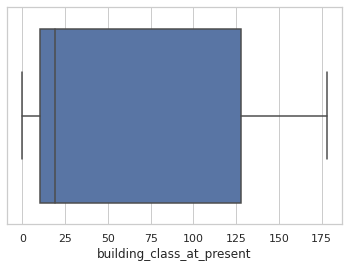

In [ ]:
sns.boxplot(x=df['building_class_at_present'])

**8-ADDRESS**

In [ ]:
check_col('address')

column name :  address
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  207383
Duplicates     :  0
 . AMBOY ROAD              1
 . HYLAN BOULEVARD         1
 00 GARDNER AVENUE         1
 1 11TH   STREET           1
 1 12TH ST EXTENSION       2
                          ..
ONE FIFTH AVENUE, 1617H    1
ONE FIFTH AVENUE, 16F      1
ONE FIFTH AVENUE, 17F      1
ONE FIFTH AVENUE, 8A       1
ONE PULASKI STREET         1
Name: address, Length: 207383, dtype: int64


In [ ]:
df['address'] =df['address'].astype('category').cat.codes

In [ ]:
df['address'].value_counts()

44755     97
44754     93
25639     90
21116     76
133       73
          ..
2541       1
64482      1
66386      1
66110      1
154266     1
Name: address, Length: 207383, dtype: int64

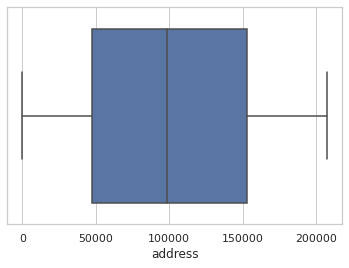

In [ ]:
sns.boxplot(x=df['address'])

**9-ZIP CODE**

In [ ]:
check_col('zip_code')

column name :  zip_code
--------------------------------
Per_of_Nulls   :  % 0.01
Num_of_Nulls   :  15
Num_of_Uniques :  194
Duplicates     :  0
0.00          419
10,001.00     870
10,002.00    1406
10,003.00    2157
10,004.00     229
             ... 
11,692.00     423
11,693.00     421
11,694.00     801
11,697.00     279
NaN            15
Name: zip_code, Length: 195, dtype: int64


**10-LAND SQUARE FEET**

In [ ]:
check_col('land_square_feet')

column name :  land_square_feet
--------------------------------
Per_of_Nulls   :  % 18.59
Num_of_Nulls   :  42692
Num_of_Uniques :  10040
Duplicates     :  0
0        45835
1            5
1,000      138
1,001        5
1,002        4
         ...  
996          1
997          3
998         12
999          1
NaN      42692
Name: land_square_feet, Length: 10041, dtype: int64


In [ ]:
df['land_square_feet'] = df['land_square_feet'].str.replace(",", ".") #Replace , by .

In [ ]:
df['land_square_feet'].values

array(['8.000', '6.200', '2.500', ..., '0', '0', '0'], dtype=object)

In [ ]:
df['land_square_feet'] = pd.to_numeric(df.land_square_feet, errors='coerce')

In [ ]:
df['land_square_feet'].dtypes

dtype('float64')

In [ ]:
#check dataframe where land_square_feet is 0 years
df[df['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
23031,queens,rego park,11,5,"2,080.00","1,002.00",142,179169,"11,374.00",314.00,0.00,314.00,0.00,"301,138","2,008.00",2.00,RR,0,2020-10-23
34550,manhattan,chelsea,22,9,799.00,"9,011.00",84,207350,"10,011.00",6,1.00,7,0.00,0,NaN,4.00,K4,0,2020-12-16
34617,manhattan,chinatown,31,9,197.00,"9,011.00",155,91283,"10,013.00",0,0.00,0,0.00,0,NaN,4.00,V1,0,2020-12-31
34648,manhattan,civic center,11,5,145.00,"1,002.00",142,73400,"10,007.00",13,0.00,13,0.00,"21,141","1,915.00",2.00,RR,0,2020-02-05
35255,manhattan,financial,11,5,8.00,"1,002.00",142,156440,"10,004.00",97,0.00,97,0.00,"126,420","1,985.00",2.00,RR,0,2020-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277409,brooklyn,wyckoff heights,44,9,"3,310.00","1,009.00",141,148259,"11,237.00",0.00,1.00,1.00,0.00,0,"2,013.00",4.00,RP,"960,000",2019-03-15
277410,brooklyn,wyckoff heights,44,9,"3,328.00","1,093.00",141,153048,"11,237.00",0.00,1.00,1.00,0.00,0,NaN,4.00,RP,"618,800",2019-10-15
277411,brooklyn,wyckoff heights,44,9,"3,328.00","1,123.00",141,153047,"11,237.00",0.00,1.00,1.00,0.00,0,NaN,4.00,RP,0,2019-05-30
277412,brooklyn,wyckoff heights,47,9,"3,280.00","1,126.00",143,154267,"11,237.00",0.00,1.00,1.00,0.00,0,"2,009.00",4.00,RS,"725,000",2019-05-03


In [ ]:
#check how many cases land_square_feet is less than 1 
zero = df[df['land_square_feet']==0] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           45835
neighborhood                      45835
building_class_category           45835
tax_class_at_present              45835
block                             45835
lot                               45835
building_class_at_present         45835
address                           45835
zip_code                          45835
residential_units                 45835
commercial_units                  45835
total_units                       45835
land_square_feet                  45835
gross_square_feet                 45835
year_built                        42060
tax_class_at_time_of_sale         45835
building_class_at_time_of_sale    45835
sale_price                        45835
sale_date                         45835
dtype: int64


**11-GROSS SQUARE FEET**

In [ ]:
check_col('gross_square_feet')

column name :  gross_square_feet
--------------------------------
Per_of_Nulls   :  % 18.59
Num_of_Nulls   :  42691
Num_of_Uniques :  9604
Duplicates     :  0
0          41954
1              3
1,000        298
1,001         18
1,002         21
           ...  
997           12
997,720        1
998           12
999           22
NaN        42691
Name: gross_square_feet, Length: 9605, dtype: int64


In [ ]:
df['gross_square_feet'] = df['gross_square_feet'].str.replace(",", ".") #Replace , by .

In [ ]:
df['gross_square_feet'].values

array(['3.660', '2.580', '1.222', ..., '0', '0', '0'], dtype=object)

In [ ]:
df['gross_square_feet'] = pd.to_numeric(df.gross_square_feet, errors='coerce')

In [ ]:
#check how many cases land_square_feet is less than 1 
zero = df[df['gross_square_feet']==0] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           41954
neighborhood                      41954
building_class_category           41954
tax_class_at_present              41954
block                             41954
lot                               41954
building_class_at_present         41954
address                           41954
zip_code                          41940
residential_units                 41954
commercial_units                  41954
total_units                       41954
land_square_feet                  41948
gross_square_feet                 41954
year_built                        35031
tax_class_at_time_of_sale         41954
building_class_at_time_of_sale    41954
sale_price                        41954
sale_date                         41954
dtype: int64


**12-YEAR BUILT**

In [ ]:
check_col('year_built')

column name :  year_built
--------------------------------
Per_of_Nulls   :  % 4.4
Num_of_Nulls   :  10104
Num_of_Uniques :  188
Duplicates     :  0
0.00         6445
1,018.00        2
1,030.00        1
1,111.00        1
1,798.00        2
            ...  
2,018.00     2360
2,019.00      734
2,020.00       73
2,021.00        2
NaN         10104
Name: year_built, Length: 189, dtype: int64


In [ ]:
df['year_built'].values

array([1998., 1975., 1925., ...,   nan, 2009., 2009.])

In [ ]:
df['year_built'].astype(str)

0         1998.0
1         1975.0
2         1925.0
3         1986.0
4         2004.0
           ...  
277409    2013.0
277410       nan
277411       nan
277412    2009.0
277413    2009.0
Name: year_built, Length: 229619, dtype: object

In [ ]:
df['year_built'],_= df['year_built'].astype(str).str.split('.',1).str

In [ ]:
df['year_built'].values

array(['1998', '1975', '1925', ..., 'nan', '2009', '2009'], dtype=object)

In [ ]:
df['year_built'] = pd.to_numeric(df.year_built, errors='coerce')

In [ ]:
df['year_built']=df['year_built'].fillna(0.0)

In [ ]:
df['year_built'] = df['year_built'].astype('int64')

In [ ]:
df['year_built'].values

array([1998, 1975, 1925, ...,    0, 2009, 2009])

In [ ]:
df['year_built'].dtypes

dtype('int64')

In [ ]:
#check how many cases where year_built is less than 1 
zero = df[df['year_built']==0] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           16549
neighborhood                      16549
building_class_category           16549
tax_class_at_present              16549
block                             16549
lot                               16549
building_class_at_present         16549
address                           16549
zip_code                          16535
residential_units                 15860
commercial_units                  13780
total_units                       16240
land_square_feet                  13394
gross_square_feet                 13400
year_built                        16549
tax_class_at_time_of_sale         16549
building_class_at_time_of_sale    16549
sale_price                        16549
sale_date                         16549
dtype: int64


In [ ]:
#remove rows where year_built = 0
df = df[df['year_built']!=0]

In [ ]:
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,staten island,annadale,01,0,"5,404.00",46.00,1,82011,"10,312.00",1.00,0.00,1.00,8.00,3.66,1998,1.00,A1,"315,000",2020-10-02
1,staten island,annadale,01,0,"5,407.00",6.00,1,81536,"10,312.00",1.00,0.00,1.00,6.20,2.58,1975,1.00,A1,"450,000",2020-06-24
2,staten island,annadale,01,0,"5,425.00",31.00,1,185826,"10,312.00",1.00,0.00,1.00,2.50,1.22,1925,1.00,A2,"525,000",2020-07-02
3,staten island,annadale,01,0,"6,205.00",17.00,5,201555,"10,312.00",1.00,0.00,1.00,1.84,1.85,1986,1.00,A5,"480,000",2020-01-14
4,staten island,annadale,01,0,"6,205.00",83.00,1,185829,"10,312.00",1.00,0.00,1.00,3.99,2.30,2004,1.00,A1,"720,000",2020-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277407,brooklyn,wyckoff heights,44,9,"3,280.00","1,132.00",141,154264,"11,237.00",0.00,1.00,1.00,0.00,0.00,2009,4.00,RP,"1,122,000",2019-04-30
277408,brooklyn,wyckoff heights,44,9,"3,280.00","1,135.00",141,154265,"11,237.00",0.00,1.00,1.00,0.00,0.00,2009,4.00,RP,"725,000",2019-05-03
277409,brooklyn,wyckoff heights,44,9,"3,310.00","1,009.00",141,148259,"11,237.00",0.00,1.00,1.00,0.00,0.00,2013,4.00,RP,"960,000",2019-03-15
277412,brooklyn,wyckoff heights,47,9,"3,280.00","1,126.00",143,154267,"11,237.00",0.00,1.00,1.00,0.00,0.00,2009,4.00,RS,"725,000",2019-05-03


**13-TAX CLASS AT TIME OF SALE**

In [ ]:
check_col('tax_class_at_time_of_sale')

column name :  tax_class_at_time_of_sale
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  3
Duplicates     :  0
1.00    114637
2.00     86612
4.00     11821
Name: tax_class_at_time_of_sale, dtype: int64


**14-BUILDING CLASS AT TIME OF SALE**

In [ ]:
check_col('building_class_at_time_of_sale')

column name :  building_class_at_time_of_sale
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  319
Duplicates     :  0
 A0      462
 A1     7173
 A2     2779
 A3      361
 A4      222
        ... 
Z1         1
Z3         6
Z4         1
Z5         2
Z9       108
Name: building_class_at_time_of_sale, Length: 319, dtype: int64


In [ ]:
df['building_class_at_time_of_sale'].value_counts()

D4      21845
R4      15982
A1      13091
 D4     12352
A5      10498
        ...  
 Y7         1
 H5         1
N4          1
N1          1
M2          1
Name: building_class_at_time_of_sale, Length: 319, dtype: int64

In [ ]:
df['building_class_at_time_of_sale']= pd.DataFrame(df['building_class_at_time_of_sale']).replace(to_replace =['A1','A1'], value = 'A1', regex = True)

In [ ]:
df['building_class_at_time_of_sale'] = df['building_class_at_time_of_sale'].str.replace(' ', '')

In [ ]:
df['building_class_at_time_of_sale'].value_counts()

D4    34197
R4    25003
A1    20264
A5    16528
B1    13866
      ...  
J3        1
Y7        1
H5        1
Y3        1
M2        1
Name: building_class_at_time_of_sale, Length: 173, dtype: int64

In [ ]:
df['building_class_at_time_of_sale'].values

array(['A1', 'A1', 'A2', ..., 'RP', 'RS', 'RS'], dtype=object)

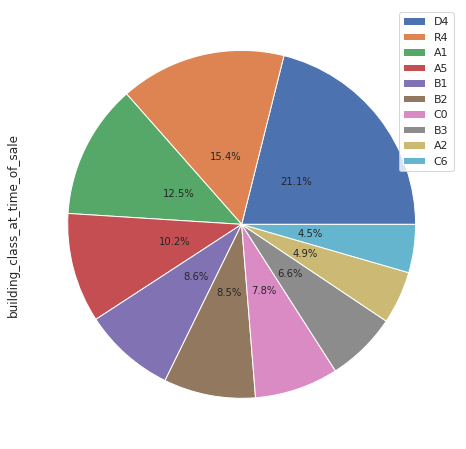

In [ ]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df['building_class_at_time_of_sale'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

**15-SALE PRICE**

In [ ]:
check_col('sale_price')

column name :  sale_price
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  23241
Duplicates     :  0
$0         14770
$0          7410
$1            71
$1            43
$1,000        62
           ...  
999,990        8
999,995        3
999,997        1
999,998        1
999,999       95
Name: sale_price, Length: 23241, dtype: int64


In [ ]:
df['sale_price'].value_counts()

0             43513
$0            14770
$0             7410
10             1424
650,000         725
              ...  
$2,764,500        1
$2,213,699        1
$2,361,737        1
$1,999,995        1
12,350,000        1
Name: sale_price, Length: 23241, dtype: int64

In [ ]:
df['sale_price'] = df['sale_price'].str.replace(",", ".") #Replace , by .

In [ ]:
df['sale_price'] = df['sale_price'].str.replace("$", "") #Replace , by .

In [ ]:
df['sale_price'].value_counts()

0             58283
0              7410
10             1934
650.000        1025
550.000         969
              ...  
3.760.588         1
2.723.818         1
1.257.750         1
6.084.043         1
12.350.000        1
Name: sale_price, Length: 20220, dtype: int64

In [ ]:
df['sale_price'].values

array(['315.000', '450.000', '525.000', ..., '960.000', '725.000',
       '1.122.000'], dtype=object)

In [ ]:
df['sale_price'] = pd.to_numeric(df.sale_price, errors='coerce')

In [ ]:
df['sale_price'].value_counts()

0.00      65693
10.00      2308
650.00     1146
550.00     1095
600.00     1082
          ...  
225.75        1
272.39        1
186.57        1
238.53        1
577.35        1
Name: sale_price, Length: 10028, dtype: int64

In [ ]:
#check how many cases where year_built is less than 1 
zero = df[df['sale_price']==0.000] #create variable called zero with condition where year_built less than 1
count = zero.count() #count the cases of less than 1

print(count)

borough                           65693
neighborhood                      65693
building_class_category           65693
tax_class_at_present              65693
block                             65693
lot                               65693
building_class_at_present         65693
address                           65693
zip_code                          65693
residential_units                 61295
commercial_units                  59207
total_units                       61544
land_square_feet                  58956
gross_square_feet                 58946
year_built                        65693
tax_class_at_time_of_sale         65693
building_class_at_time_of_sale    65693
sale_price                        65693
sale_date                         65693
dtype: int64


>`$0 Sales Price: 
A $0 sale indicates that there was a transfer of ownership without a cash consideration. 
There can be a number of reasons for a $0 sale including transfers of ownership from 
parents to children`

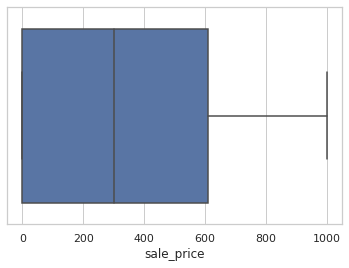

In [ ]:
#check outliers
sns.boxplot(x=df['sale_price'])

**16-SALE DATE**

In [ ]:
check_col('sale_date')

column name :  sale_date
--------------------------------
Per_of_Nulls   :  % 0.0
Num_of_Nulls   :  0
Num_of_Uniques :  1095
Duplicates     :  12
2018-01-01     66
2018-01-02    137
2018-01-03    243
2018-01-04    121
2018-01-05    251
             ... 
2020-12-27      5
2020-12-28    119
2020-12-29    136
2020-12-30    134
2020-12-31     56
Name: sale_date, Length: 1095, dtype: int64


In [ ]:
df['sale_date'].values

array(['2020-10-02', '2020-06-24', '2020-07-02', ..., '2019-03-15',
       '2019-05-03', '2019-04-30'], dtype=object)

In [ ]:
#Separate values for create new two fields from them:
df['sale_date'],_= df['sale_date'].str.split('-',1).str

In [ ]:
df['sale_date'].value_counts()

2019    77790
2018    76658
2020    58622
Name: sale_date, dtype: int64

<a>**What is year the property sold most?**

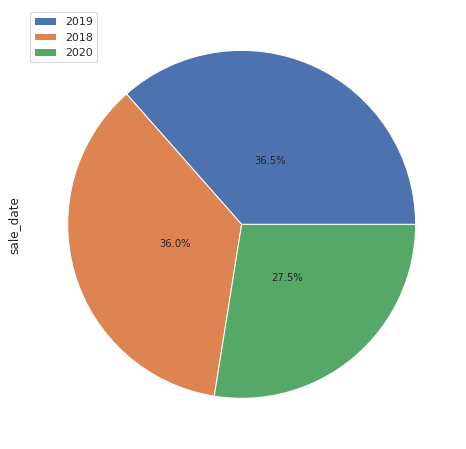

In [ ]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df['sale_date'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

In [ ]:
df['sale_date'] = pd.to_numeric(df.sale_date, errors='coerce')

In [ ]:
df['sale_date'] = df['sale_date'].astype('int64')

In [ ]:
df['sale_date'].value_counts()

2019    77790
2018    76658
2020    58622
Name: sale_date, dtype: int64

**17-RESIDENTIAL UNITS**

In [ ]:
df['residential_units'].value_counts()

1.0      65072
2.0      33515
1        22193
0.0      15605
2        11914
         ...  
235          1
69           1
209          1
89           1
177.0        1
Name: residential_units, Length: 355, dtype: int64

In [ ]:
df['residential_units'].values

array([1.0, 1.0, 1.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [ ]:
df['residential_units'].isnull().sum()

29916

**18-COMMERCIAL UNITS**

In [ ]:
df['commercial_units'].value_counts()

0.0     133821
0        23154
1.0      12307
2.0       1789
1         1415
         ...  
94.0         1
46.0         1
75.0         1
95.0         1
32.0         1
Name: commercial_units, Length: 130, dtype: int64

In [ ]:
df['commercial_units'].isnull().sum()

38293

<a>I will drop these columns because there are another columns (total unites)

In [ ]:
df.drop(["commercial_units","residential_units"], axis=1, inplace=True)

**19-TOTAL UNITS**

In [ ]:
df['total_units'].value_counts()

1.0      69853
2.0      33177
1        24243
2        11655
3.0      10937
         ...  
134          1
72           1
299          1
121          1
188.0        1
Name: total_units, Length: 386, dtype: int64

In [ ]:
df['total_units'].isnull().sum()

28667

In [ ]:
df.dropna(subset=['total_units'], how='all', inplace=True)

In [ ]:
df['total_units'].isnull().sum()#check again

0

In [ ]:
df['total_units'].values

array([1.0, 1.0, 1.0, ..., 1.0, 1.0, 1.0], dtype=object)

In [ ]:
df['total_units'] = pd.to_numeric(df.total_units, errors='coerce')

In [ ]:
df['total_units'].dtypes

dtype('float64')



---

In [ ]:
#check other null value after EDA
from numpy.ma.core import array
#this return the first 20 columns have null value 
null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:21]

,null_val,percent_
sale_price,34920,19.00
gross_square_feet,10960,6.00
land_square_feet,10941,6.00
borough,0,0.00
total_units,8,0.00
building_class_at_time_of_sale,0,0.00
tax_class_at_time_of_sale,0,0.00
year_built,0,0.00
zip_code,1,0.00
neighborhood,0,0.00


In [ ]:
df.dtypes

borough                            object
neighborhood                       object
building_class_category            object
tax_class_at_present                 int8
block                             float64
lot                               float64
building_class_at_present           int16
address                             int32
zip_code                          float64
total_units                       float64
land_square_feet                  float64
gross_square_feet                 float64
year_built                          int64
tax_class_at_time_of_sale         float64
building_class_at_time_of_sale     object
sale_price                        float64
sale_date                           int64
dtype: object

In [ ]:
numerics = ['int16','int8', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [ ]:
newdf

,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,sale_date
0,0,"5,404.00",46.00,1,82011,"10,312.00",1.00,8.00,3.66,1998,1.00,315.00,2020
1,0,"5,407.00",6.00,1,81536,"10,312.00",1.00,6.20,2.58,1975,1.00,450.00,2020
2,0,"5,425.00",31.00,1,185826,"10,312.00",1.00,2.50,1.22,1925,1.00,525.00,2020
3,0,"6,205.00",17.00,5,201555,"10,312.00",1.00,1.84,1.85,1986,1.00,480.00,2020
4,0,"6,205.00",83.00,1,185829,"10,312.00",1.00,3.99,2.30,2004,1.00,720.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277407,9,"3,280.00","1,132.00",141,154264,"11,237.00",1.00,0.00,0.00,2009,4.00,NaN,2019
277408,9,"3,280.00","1,135.00",141,154265,"11,237.00",1.00,0.00,0.00,2009,4.00,725.00,2019
277409,9,"3,310.00","1,009.00",141,148259,"11,237.00",1.00,0.00,0.00,2013,4.00,960.00,2019
277412,9,"3,280.00","1,126.00",143,154267,"11,237.00",1.00,0.00,0.00,2009,4.00,725.00,2019


In [ ]:
df

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,staten island,annadale,01,0,"5,404.00",46.00,1,82011,"10,312.00",1.00,8.00,3.66,1998,1.00,A1,315.00,2020
1,staten island,annadale,01,0,"5,407.00",6.00,1,81536,"10,312.00",1.00,6.20,2.58,1975,1.00,A1,450.00,2020
2,staten island,annadale,01,0,"5,425.00",31.00,1,185826,"10,312.00",1.00,2.50,1.22,1925,1.00,A2,525.00,2020
3,staten island,annadale,01,0,"6,205.00",17.00,5,201555,"10,312.00",1.00,1.84,1.85,1986,1.00,A5,480.00,2020
4,staten island,annadale,01,0,"6,205.00",83.00,1,185829,"10,312.00",1.00,3.99,2.30,2004,1.00,A1,720.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277407,brooklyn,wyckoff heights,44,9,"3,280.00","1,132.00",141,154264,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,NaN,2019
277408,brooklyn,wyckoff heights,44,9,"3,280.00","1,135.00",141,154265,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,725.00,2019
277409,brooklyn,wyckoff heights,44,9,"3,310.00","1,009.00",141,148259,"11,237.00",1.00,0.00,0.00,2013,4.00,RP,960.00,2019
277412,brooklyn,wyckoff heights,47,9,"3,280.00","1,126.00",143,154267,"11,237.00",1.00,0.00,0.00,2009,4.00,RS,725.00,2019




---

# **Task 2**

> Task 2: **Data exploration using data visualization.
Raise two questions that can be answered by performing data visualization. Briefely mention why you think this question would be interesting to whom (who is your audience). Think about the EDA principals.**

### <a>**Data exploration using data visualization**

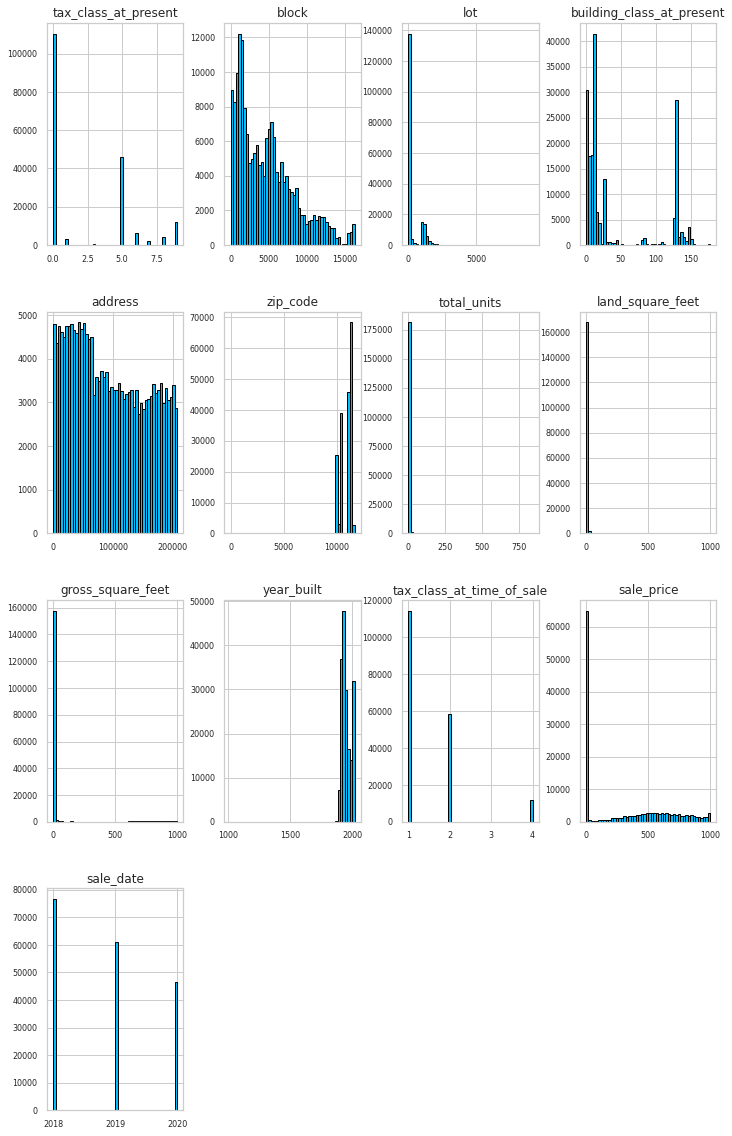

In [ ]:
# TODO write code to answer Q2.1
# Plot the distribution of all the numerical data
fig_ = df.hist(figsize=(12, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

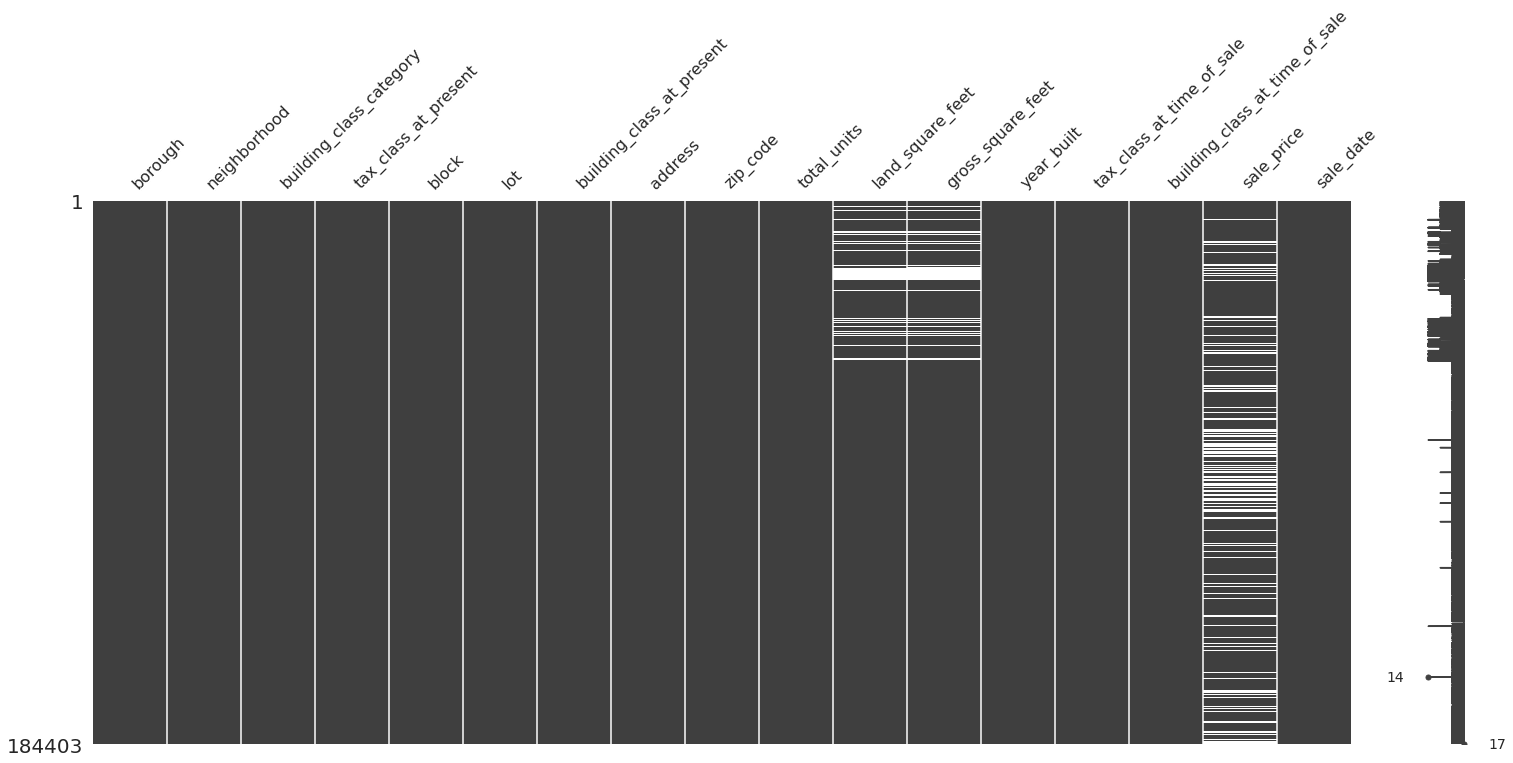

In [ ]:
#Matrix plot 
import missingno as msnum 
msnum.matrix(df)

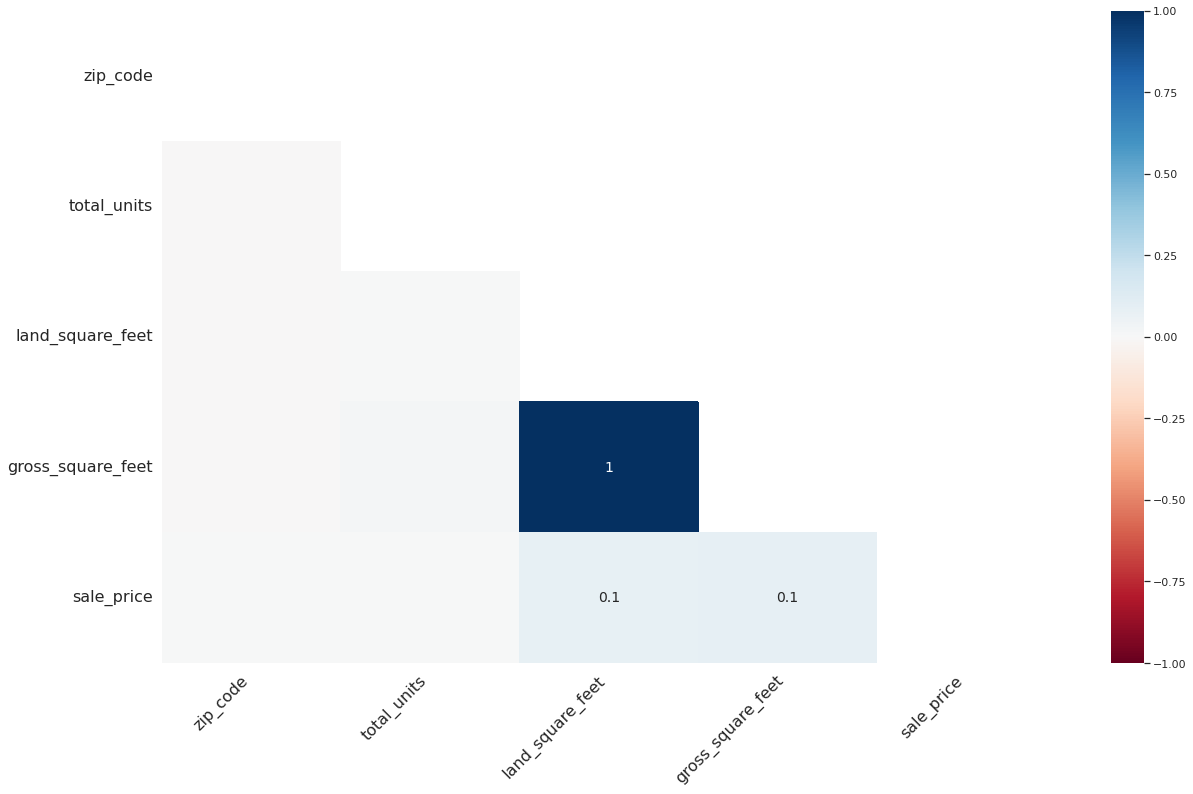

In [ ]:
#Heatmaps 
import missingno as msnum 
msnum.heatmap(df)

><a>**Handle missing data** 

In [ ]:
from sklearn.impute import SimpleImputer
# missing_values type for imputation
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')

In [ ]:
df['sale_price'] = imputer.fit_transform(df['sale_price'].to_numpy().reshape(-1,1))

In [ ]:
from sklearn.impute import SimpleImputer
# missing_values type for imputation
imputer_f= SimpleImputer(missing_values = np.nan,
                        strategy ='median')

In [ ]:
df['land_square_feet'] = imputer_f.fit_transform(df['land_square_feet'].to_numpy().reshape(-1,1))

In [ ]:
df['gross_square_feet'] = imputer_f.fit_transform(df['gross_square_feet'].to_numpy().reshape(-1,1))

In [ ]:
df['zip_code'] = imputer_f.fit_transform(df['zip_code'].to_numpy().reshape(-1,1))

In [ ]:
df['total_units'] = imputer_f.fit_transform(df['total_units'].to_numpy().reshape(-1,1))

In [ ]:
num_data, cat_data = list(df.select_dtypes(include=np.number)), list(df.select_dtypes(exclude=np.number))

In [ ]:
df.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
building_class_at_present         0
address                           0
zip_code                          0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

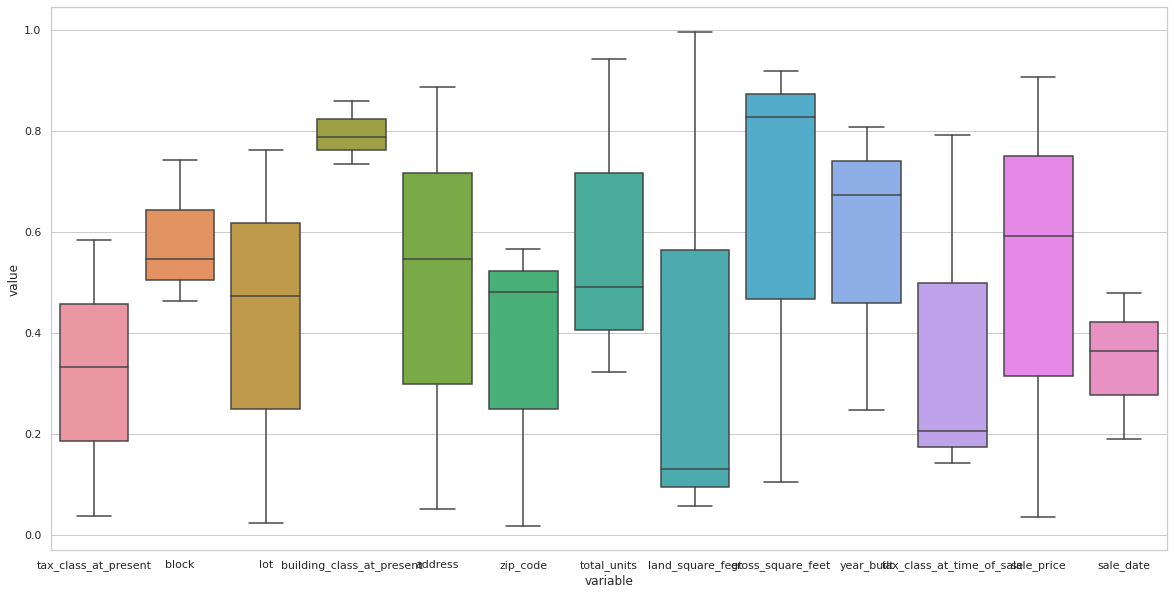

In [ ]:
from IPython.core.pylabtools import figsize
figsize(20,10)
df_num = pd.DataFrame(data = np.random.random(size=(3,13)), columns =['tax_class_at_present',
 'block',
 'lot',
 'building_class_at_present',
 'address',
 'zip_code',
 'total_units',
 'land_square_feet',
 'gross_square_feet',
 'year_built',
 'tax_class_at_time_of_sale',
 'sale_price',
 'sale_date'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_num))

plt.show()

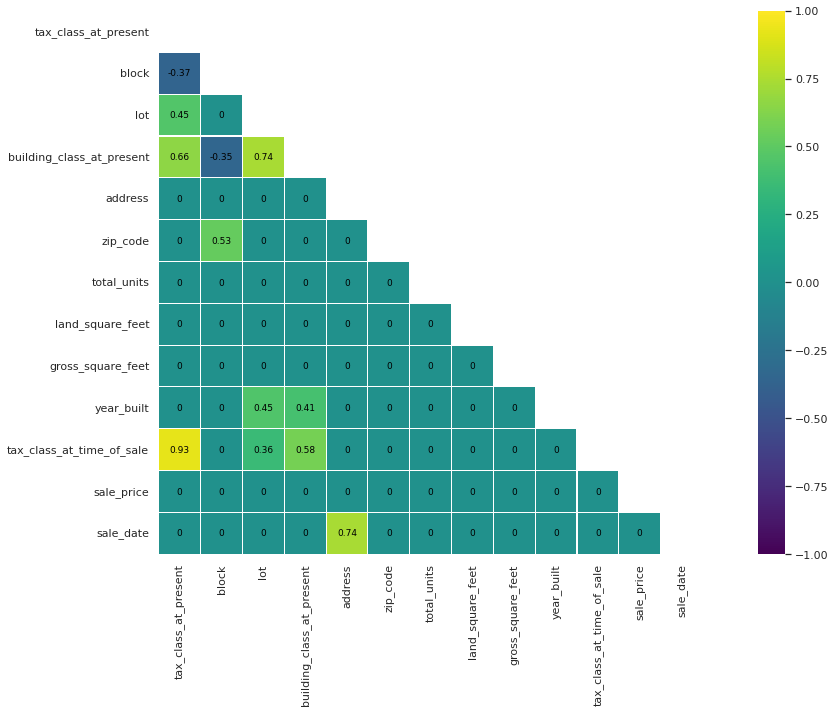

In [ ]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = df.corr()

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

### <a>Question 2.1: {What is the average selling price of homes in َqueens area?}

In [ ]:
!pip install pandasql

In [ ]:
df_easy_apply = df[df['borough'] == "queens"]
df_easy_apply.reset_index()
df_easy_apply

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
7876,queens,airport la guardia,01,0,949.00,41.00,5,112564,"11,370.00",1.00,1.80,1.22,1945,1.00,A5,584.57,2020
7878,queens,arverne,01,0,"15,830.00",20.00,5,140863,"11,691.00",1.00,2.47,1.48,2005,1.00,A5,300.00,2020
7879,queens,arverne,01,0,"15,830.00",27.00,5,149330,"11,691.00",1.00,2.33,1.35,2005,1.00,A5,360.00,2020
7880,queens,arverne,01,0,"15,831.00",27.00,5,150713,"11,691.00",1.00,2.47,1.33,2006,1.00,A5,465.00,2020
7881,queens,arverne,01,0,"15,835.00",32.00,2,149511,"11,691.00",1.00,2.72,1.07,1920,1.00,A2,0.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224407,queens,woodside,44,9,"2,324.00","1,106.00",138,55439,"11,377.00",1.00,0.00,153.00,2008,4.00,RG,0.00,2018
224408,queens,woodside,44,9,"2,324.00","1,137.00",138,55439,"11,377.00",1.00,24.00,153.00,2008,4.00,RG,10.00,2018
224409,queens,woodside,44,9,"2,324.00","1,141.00",138,55439,"11,377.00",1.00,24.00,153.00,2008,4.00,RG,0.00,2018
224410,queens,woodside,44,9,"2,324.00","1,141.00",138,55439,"11,377.00",1.00,24.00,153.00,2008,4.00,RG,0.00,2018


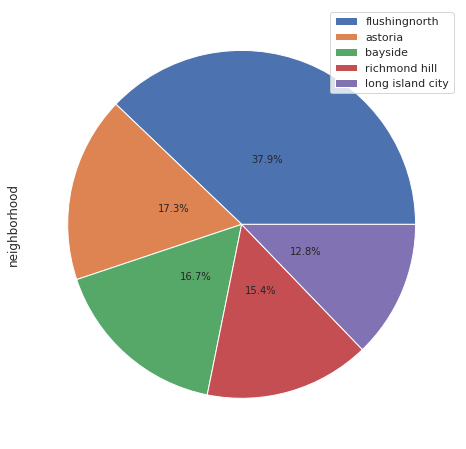

In [ ]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df_easy_apply['neighborhood'].value_counts()[:5].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

In [ ]:
df_easy_apply['sale_price'].mean()# for Queens

339.0063619081958

In [ ]:
import pandasql as ps
from pandasql import sqldf
df_task_hungry_sectors = """SELECT neighborhood, COUNT(*) AS count
                    FROM  df_easy_apply
                    GROUP BY neighborhood
                    ORDER BY count DESC
                    LIMIT 20"""
ps.sqldf(df_task_hungry_sectors)

,neighborhood,count
0,flushingnorth,5743
1,astoria,2621
2,bayside,2532
3,richmond hill,2333
4,long island city,1940
5,st. albans,1929
6,so. jamaicabaisley park,1894
7,queens village,1890
8,flushingsouth,1874
9,elmhurst,1791


In [ ]:
df_task_highest_salary_top_comp = """SELECT neighborhood,MAX(sale_price) 
             FROM  df_easy_apply
             GROUP BY neighborhood
             ORDER BY sale_price DESC
             LIMIT 10"""
ps.sqldf(df_task_highest_salary_top_comp) 

,neighborhood,MAX(sale_price)
0,astoria,"1,000.00"
1,bayside,"1,000.00"
2,belle harbor,"1,000.00"
3,east elmhurst,"1,000.00"
4,flushingnorth,"1,000.00"
5,flushingsouth,"1,000.00"
6,forest hills,"1,000.00"
7,glendale,"1,000.00"
8,hollis hills,"1,000.00"
9,holliswood,"1,000.00"


In [ ]:
# New Dataframe through method 'Groupby' from 'pandas' packet
df_easy_apply_2 = df_easy_apply.groupby(['neighborhood'])['sale_price'].mean().reset_index()
# Apply concate fields and order descendent for dataframe before and perform cut in ten primary
df_easy = pd.DataFrame()
df_easy = pd.concat([df_easy_apply_2['neighborhood'], 
                     df_easy_apply_2['sale_price']], axis = 1)
df_easy = df_easy.sort_values('sale_price', ascending = False).head(40).reset_index().drop('index', axis = 1)
df_easy.head(40)

,neighborhood,sale_price
0,belle harbor,419.66
1,hollis hills,418.55
2,college point,416.93
3,glendale,409.53
4,east elmhurst,400.22
5,long island city,399.89
6,middle village,396.95
7,breezy point,396.34
8,woodhaven,393.93
9,jamaica hills,390.96


In [ ]:
# Plot graph bar with Plotly included color graduation in function the Max Salary Mean.
import plotly.express as px
chart = px.bar(df_easy, y = 'sale_price', x = 'neighborhood', color = 'sale_price',
              color_continuous_scale = px.colors.sequential.Viridis,
              title = "What is the average selling price of homes in the queens .areas?")
chart.show()

### **What is the borough where most buildings are sold?**

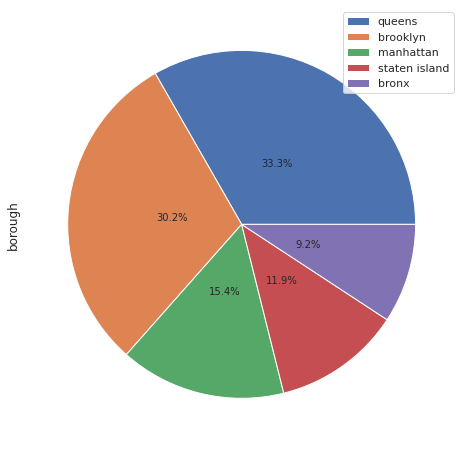

In [ ]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df['borough'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

>**Findings**

`
From these statistics, I found that queens are the most borough selling houses, so I wanted to know the average prices of buildings in their neighborhoods`

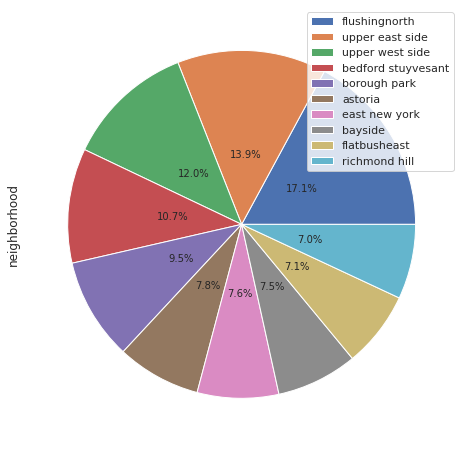

In [ ]:
#visualization jop title
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
df['neighborhood'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

### <a>Question 2.2: {Are old buildings more expensive than new ones?}

In [ ]:
df_easy_2= df[df['sale_date'] ==2019]#i choose sale date =2019 because this was the most year that buildings sold
df_easy_2.reset_index()
df_easy_2

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
59905,staten island,annadale,01,0,"5,391.00",13.00,5,167306,"10,312.00",1.00,1.87,910.00,2002,1.00,A5,0.00,2019
59906,staten island,annadale,01,0,"5,393.00",29.00,1,119283,"10,312.00",1.00,9.00,3.54,1985,1.00,A1,329.04,2019
59907,staten island,annadale,01,0,"5,395.00",23.00,1,172108,"10,312.00",1.00,10.00,2.85,1980,1.00,A1,775.00,2019
59908,staten island,annadale,01,0,"5,398.00",20.00,1,96056,"10,312.00",1.00,5.00,2.20,1940,1.00,A1,685.00,2019
59909,staten island,annadale,01,0,"5,399.00",15.00,2,115159,"10,312.00",1.00,4.84,880.00,1950,1.00,A2,0.00,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277407,brooklyn,wyckoff heights,44,9,"3,280.00","1,132.00",141,154264,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,329.04,2019
277408,brooklyn,wyckoff heights,44,9,"3,280.00","1,135.00",141,154265,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,725.00,2019
277409,brooklyn,wyckoff heights,44,9,"3,310.00","1,009.00",141,148259,"11,237.00",1.00,0.00,0.00,2013,4.00,RP,960.00,2019
277412,brooklyn,wyckoff heights,47,9,"3,280.00","1,126.00",143,154267,"11,237.00",1.00,0.00,0.00,2009,4.00,RS,725.00,2019


In [ ]:
# New Dataframe through method 'Groupby' from 'pandas' packet
df_easy_2 = df_easy_2.groupby(['year_built'])['sale_price'].mean().reset_index()
# Apply concate fields and order descendent for dataframe before and perform cut in ten primary
df_easy = pd.DataFrame()
df_easy = pd.concat([df_easy_2['year_built'], 
                     df_easy_2['sale_price']], axis = 1)
df_easy = df_easy.sort_values('sale_price', ascending = False).head(20).reset_index().drop('index', axis = 1)
df_easy.head(20)

,year_built,sale_price
0,1942,523.84
1,2018,491.92
2,1030,485.00
3,1840,483.01
4,2017,462.38
5,1845,458.69
6,1914,440.37
7,1953,430.35
8,1956,419.95
9,2016,402.25


In [ ]:
# Plot graph bar with Plotly included color graduation in function the Max Salary Mean.
import plotly.express as px
chart = px.bar(df_easy, y = 'sale_price', x = 'year_built', color = 'sale_price',
              color_continuous_scale = px.colors.sequential.Viridis,
              title = "What is the average selling price by construction date??")
chart.show()

> **Findings:**

`As we see there are no relation between year of built and avg_price
I asked this Qestion Because most people buy very old homes at a low price compared to modern homes, but from these statistics it was found that there is not a big difference between old and new homes in terms of price, and perhaps this matter varies from neighborhood to neighborhood`

# **Task 3**

> Task 3: **Data Exploration via Statistical Test
Raise one question that can be answered by performing hypothesis test. Briefely mention why you think this question would be interesting to whom (who is your audience). Also mention which statistical test you would choose and why.**

In [ ]:
df_easy_bronx= df[df['borough'] == "bronx"]
df_easy_bronx.reset_index()
df_easy_bronx

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
51755,bronx,bathgate,01,0,"3,029.00",36.00,5,160590,"10,457.00",1.00,1.57,1.53,1899,1.00,A5,0.00,2020
51756,bronx,bathgate,01,0,"3,030.00",65.00,1,164284,"10,457.00",1.00,1.62,1.59,1899,1.00,A1,458.00,2020
51757,bronx,bathgate,01,0,"3,030.00",67.00,1,164270,"10,457.00",1.00,1.65,1.50,1899,1.00,A1,275.00,2020
51758,bronx,bathgate,01,0,"3,030.00",67.00,1,164270,"10,457.00",1.00,1.65,1.50,1899,1.00,A1,475.00,2020
51759,bronx,bathgate,01,0,"3,039.00",29.00,9,127439,"10,458.00",1.00,1.09,1.26,1910,1.00,A9,165.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247514,bronx,woodlawn,03,0,"3,394.00",27.00,14,164004,"10,470.00",3.00,3.47,4.04,1920,1.00,C0,0.00,2019
247515,bronx,woodlawn,06,0,"3,378.00",28.00,44,129171,"10,470.00",0.00,2.00,0.00,1950,1.00,G0,655.00,2019
247516,bronx,woodlawn,07,6,"3,376.00",73.00,16,135509,"10,470.00",5.00,2.85,3.65,1929,2.00,C2,329.04,2019
247517,bronx,woodlawn,08,5,"3,397.00",29.00,27,172275,"10,470.00",53.00,12.08,52.60,1938,2.00,D3,0.00,2019


In [ ]:
df_easy_bronx['sale_price'].mean()

328.23954951836987

In [ ]:
df_easy_staten_island= df[df['borough'] == "staten island"]
df_easy_staten_island.reset_index()
df_easy_staten_island

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,staten island,annadale,01,0,"5,404.00",46.00,1,82011,"10,312.00",1.00,8.00,3.66,1998,1.00,A1,315.00,2020
1,staten island,annadale,01,0,"5,407.00",6.00,1,81536,"10,312.00",1.00,6.20,2.58,1975,1.00,A1,450.00,2020
2,staten island,annadale,01,0,"5,425.00",31.00,1,185826,"10,312.00",1.00,2.50,1.22,1925,1.00,A2,525.00,2020
3,staten island,annadale,01,0,"6,205.00",17.00,5,201555,"10,312.00",1.00,1.84,1.85,1986,1.00,A5,480.00,2020
4,staten island,annadale,01,0,"6,205.00",83.00,1,185829,"10,312.00",1.00,3.99,2.30,2004,1.00,A1,720.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233196,staten island,woodrow,02,0,"7,349.00",12.00,13,56100,"10,309.00",2.00,3.72,1.85,1998,1.00,B9,680.00,2018
233197,staten island,woodrow,05,2,"7,094.00",61.00,154,28800,"10,309.00",0.00,4.43,0.00,2018,1.00,V0,793.22,2018
233198,staten island,woodrow,05,0,"7,267.00",289.00,5,45116,"10,309.00",1.00,2.96,2.61,2018,1.00,V0,671.03,2018
233199,staten island,woodrow,05,0,"7,267.00",298.00,5,3538,"10,309.00",1.00,4.11,2.61,2018,1.00,V0,610.95,2018


In [ ]:
df_easy_staten_island['sale_price'].mean()

365.29978028918356

In [ ]:
df_easy_Manhattan= df[df['borough'] == "manhattan"]
df_easy_Manhattan.reset_index()
df_easy_Manhattan

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
33993,manhattan,alphabet city,02,0,377.00,72.00,13,127144,"10,009.00",2.00,1.72,5.15,1901,1.00,B9,0.00,2020
33994,manhattan,alphabet city,03,0,377.00,66.00,14,129981,"10,009.00",3.00,2.38,3.08,1899,1.00,C0,0.00,2020
33995,manhattan,alphabet city,03,0,377.00,66.00,14,129981,"10,009.00",3.00,2.38,3.08,1899,1.00,C0,329.04,2020
33996,manhattan,alphabet city,07,7,372.00,10.00,21,137404,"10,009.00",10.00,2.02,6.45,1900,2.00,C7,0.00,2020
33997,manhattan,alphabet city,07,7,374.00,1.00,21,142393,"10,009.00",10.00,1.50,6.93,1900,2.00,C7,329.04,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171528,manhattan,washington heights upper,22,9,"2,154.00",1.00,82,176366,"10,033.00",9.00,17.50,35.00,1959,4.00,K2,0.00,2019
171529,manhattan,washington heights upper,22,9,"2,154.00",5.00,84,93706,"10,033.00",2.00,2.00,4.88,1905,4.00,K4,0.00,2019
171530,manhattan,washington heights upper,22,9,"2,170.00",104.00,81,185920,"10,040.00",1.00,2.50,2.50,1960,4.00,K1,0.00,2019
171533,manhattan,washington heights upper,29,9,"2,175.00",1.00,45,166661,"10,040.00",3.00,47.17,75.00,1928,4.00,G1,329.04,2019


In [ ]:
df_easy_Manhattan['sale_price'].mean()

332.2810986673002

In [ ]:
df_easy_Brooklyn= df[df['borough'] == "brooklyn"]
df_easy_Brooklyn.reset_index()
df_easy_Brooklyn

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,building_class_at_present,address,zip_code,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
74768,brooklyn,bath beach,01,0,"6,359.00",70.00,147,197844,"11,228.00",2.00,1.93,4.08,1930,1.00,S1,329.04,2020
74769,brooklyn,bath beach,01,0,"6,360.00",48.00,5,91728,"11,228.00",1.00,2.51,1.43,1930,1.00,A5,849.00,2020
74770,brooklyn,bath beach,01,0,"6,360.00",56.00,5,140907,"11,228.00",1.00,1.55,1.43,1930,1.00,A5,75.00,2020
74771,brooklyn,bath beach,01,0,"6,362.00",23.00,9,162189,"11,228.00",1.00,2.28,1.05,1901,1.00,A9,0.00,2020
74772,brooklyn,bath beach,01,0,"6,367.00",24.00,9,197731,"11,214.00",1.00,1.57,1.46,1935,1.00,A9,830.00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277407,brooklyn,wyckoff heights,44,9,"3,280.00","1,132.00",141,154264,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,329.04,2019
277408,brooklyn,wyckoff heights,44,9,"3,280.00","1,135.00",141,154265,"11,237.00",1.00,0.00,0.00,2009,4.00,RP,725.00,2019
277409,brooklyn,wyckoff heights,44,9,"3,310.00","1,009.00",141,148259,"11,237.00",1.00,0.00,0.00,2013,4.00,RP,960.00,2019
277412,brooklyn,wyckoff heights,47,9,"3,280.00","1,126.00",143,154267,"11,237.00",1.00,0.00,0.00,2009,4.00,RS,725.00,2019


In [ ]:
df_easy_Brooklyn['sale_price'].mean()

302.4046248667411

In [ ]:
df['sale_price'].mean()

329.0442359397783

**Finding**

```
mean of sale_price according to each borough is
339.0063619081958 for queens
302.4046248667411 for Brooklyn
332.2810986673002 for Manhattan
365.29978028918356 for staten_island
329.0442359397783 for all


### <a>**One-Sample T-Test**

`A one-sample t-test checks whether a sample mean differs from the population mean.`


`I choose this question to compare between Avg_price in different samples (borough)
according to all Population if equal or not`

```
Null hypothesis - Average sale prices for all borough are the same
Alternative hypothesis - it different according to each borough 
Significance level - The significance level is 0.25 (allowing for a better 
shot at proving your alternative hypothesis).
P-value - The p-value is calculated as 0.05.
```

In [ ]:
stats.ttest_1samp(a = df_easy_Brooklyn['sale_price'],               # Sample data
                 popmean = df['sale_price'].mean())  # Pop mean

Ttest_1sampResult(statistic=-20.22898410976625, pvalue=1.1540482204110763e-90)


`The test result shows the test statistic "t" is equal to -20.22898410976625. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():`

In [ ]:
stats.t.ppf(q=0.025,  # Quantile to check
            df=49)  # Degrees of freedom

-2.0095752344892093

In [ ]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209

`We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function:`

In [ ]:
stats.t.cdf(x= -20.22898410976625,      # T-test statistic
               df= 49) * 2   # Multiply by two for two tailed test *

1.9581765174313444e-25

`Null hypothesis: the mean of sample (as sale price in queens is equal to population mean of price`

`Alternative hypothesis: we are checking is whether the sample mean differs (is not equal to) the population mean.`

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
price = np.array(df['sale_price']) #(population)
print(price)
price_mean = np.mean(price)
print(price_mean)
tset, pval = ttest_1samp(price,302.4046248667411)#the mean of sale price in Brooklyn (sample)

print('p-values',pval)

if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

[315.         450.         525.         ... 960.         725.
 329.04423594]
329.04423593987275
p-values 0.0
 we are rejecting null hypothesis


**Finding**

`The alternative hypothesis we are checking is whether the sample mean differs (is not equal to) the population mean.`

# **Task 4**

> Task 4: **Feature Engineering. If we would like to predict the house sale price. Analyze the scale of each attribute and determine which ones you would transfer (e.g., cateogorical features). Discuss how you plan to select important features.**

## Discuss how you plan to select important features

I wil use feature selection by **SelectKBest** method  

### Transform the categorical data  to numerical columns

In [ ]:
df['borough'] =df['borough'].astype('category').cat.codes

In [ ]:
df['neighborhood'] =df['neighborhood'].astype('category').cat.codes

In [ ]:
df['building_class_category'] =df['building_class_category'].astype('category').cat.codes

In [ ]:
df['building_class_at_time_of_sale'] =df['building_class_at_time_of_sale'].astype('category').cat.codes

In [ ]:
from sklearn.feature_selection import SelectKBest
# Train, test, split
from sklearn.model_selection import train_test_split
X = df.drop(['sale_price'],1)
# Create target variable
y = df['sale_price']

### **Feature_selection**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
#stander scaler 
pipeline = Pipeline([
    ("MinMax Scaling", MinMaxScaler()),
    ("SGD Regression", SGDRegressor())
])

In [ ]:
# Scale the data and fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('MinMax Scaling', MinMaxScaler()),
                ('SGD Regression', SGDRegressor())])

In [ ]:
Y_pred = pipeline.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('Score', pipeline.score(X_test, y_test))

Mean Absolute Error:  249.42015643792465
Score 0.021769117478468214


In [ ]:
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=16)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


Feature 0: 441.102027
Feature 1: 91.090836
Feature 2: 413.587392
Feature 3: 333.871485
Feature 4: 93.625701
Feature 5: 217.853844
Feature 6: 0.061213
Feature 7: 46.307911
Feature 8: 60.802301
Feature 9: 186.223790
Feature 10: 1.120482
Feature 11: 174.682462
Feature 12: 790.318440
Feature 13: 708.870813
Feature 14: 0.017892
Feature 15: 73.763007


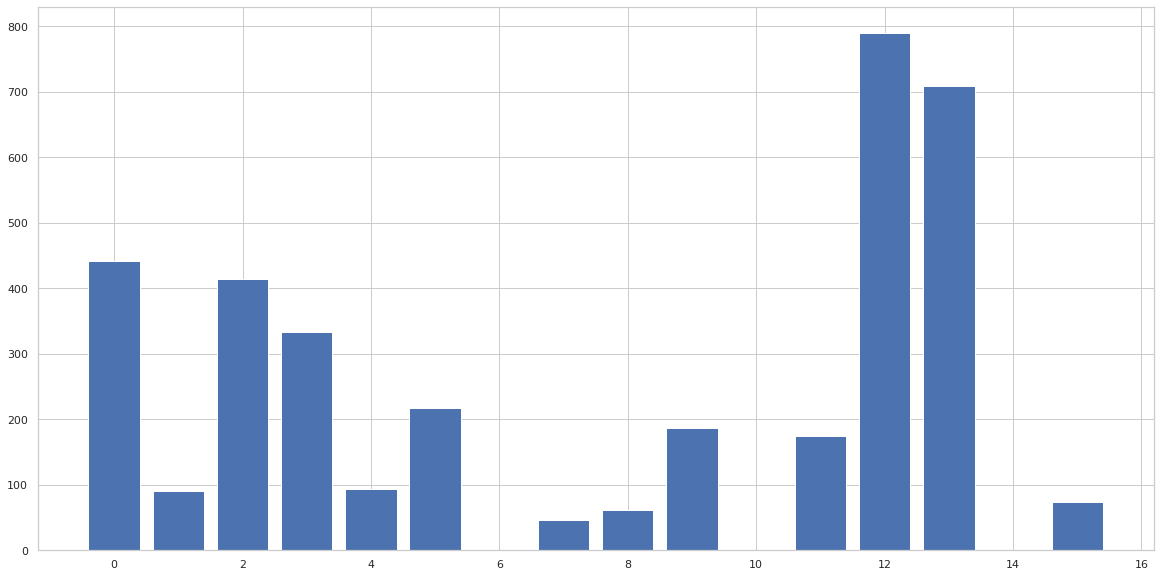

In [ ]:
from matplotlib import pyplot
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train_fs,y_train)

LinearRegression()

In [ ]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test_fs)

In [ ]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 249.82118383948762
MSE: 89955.8324391583
RMSE: 299.92637836502195


In [ ]:
# Score It
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.022423810515159737


`An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.`

# **Task 5**

> Task 5: AutoML
**Using Auto-sklearn to explore performance of one state-of-the-art autoML tool on the given data (after your previous preprocessing). Optional: compare with performing autosklearn on raw data.
ref. https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html**

In [ ]:
# !pip install --upgrade azureml-sdk[notebooks,automl]

In [ ]:
# !pip install -U mljar-supervised

In [ ]:
# TODO for Task 5
from sklearn.metrics import mean_squared_error
from supervised.automl import AutoML # mljar-supervised


X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25,
    random_state=123,
)

# train models with AutoML
automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

# compute the MSE on test data
predictions = automl.predict(X_test)
print("Test MSE:", mean_squared_error(y_test, predictions))

Linear algorithm was disabled.
AutoML directory: AutoML_6
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline rmse 301.832433 trained in 0.82 seconds
2_DecisionTree rmse 295.433829 trained in 11.89 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost rmse 281.853465 trained in 53.35 seconds
4_Default_NeuralNetwork rmse 294.670839 trained in 12.49 seconds
5_Default_RandomForest rmse 292.742201 trained in 39.69 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 281.853465 trained in 0.4 seconds
AutoML fit time: 128.97 seconds
AutoML best model: 3_Default_Xgboost
Test MSE: 80156.68769670918


In [ ]:
print('R^2 =',metrics.explained_variance_score(y_test,predictions))

R^2 = 0.13019637554026975




---

In [ ]:
# !pip install auto-sklearn

In [ ]:
from pprint import pprint

import sklearn.metrics

import autosklearn.regression

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=200,
    per_run_time_limit=200,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)
automl.fit(X_train, y_train, dataset_name='DATA')

[WARNING] [2022-04-26 03:44:05,220:Client-AutoML(1):DATA] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (198.615360)
[WARNING] [2022-04-26 03:44:05,223:Client-AutoML(1):DATA] Capping the per_run_time_limit to 99.0 to have time for a least 2 models in each process.


AutoSklearnRegressor(per_run_time_limit=200, time_left_for_this_task=200,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

In [ ]:
pprint(automl.sprint_statistics())

('auto-sklearn results:\n'
 '  Dataset name: DATA\n'
 '  Metric: r2\n'
 '  Best validation score: 0.050207\n'
 '  Number of target algorithm runs: 31\n'
 '  Number of successful target algorithm runs: 1\n'
 '  Number of crashed target algorithm runs: 0\n'
 '  Number of target algorithms that exceeded the time limit: 1\n'
 '  Number of target algorithms that exceeded the memory limit: 29\n')


In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight           type  cost  duration
model_id                                                      
30           1             1.00  decision_tree  0.95      2.91


In [ ]:
pprint(automl.show_models(), indent=4)

{   30: {   'cost': 0.9497932318952843,
            'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f41563b1790>,
            'ensemble_weight': 1.0,
            'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f41563a5250>,
            'model_id': 30,
            'rank': 1,
            'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f415640f410>,
            'sklearn_regressor': DecisionTreeRegressor(criterion='friedman_mse', max_depth=13,
                      min_samples_leaf=16, min_samples_split=9, random_state=1)}}


In [ ]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.11137557889120786
Test R2 score: 0.04859405363127045


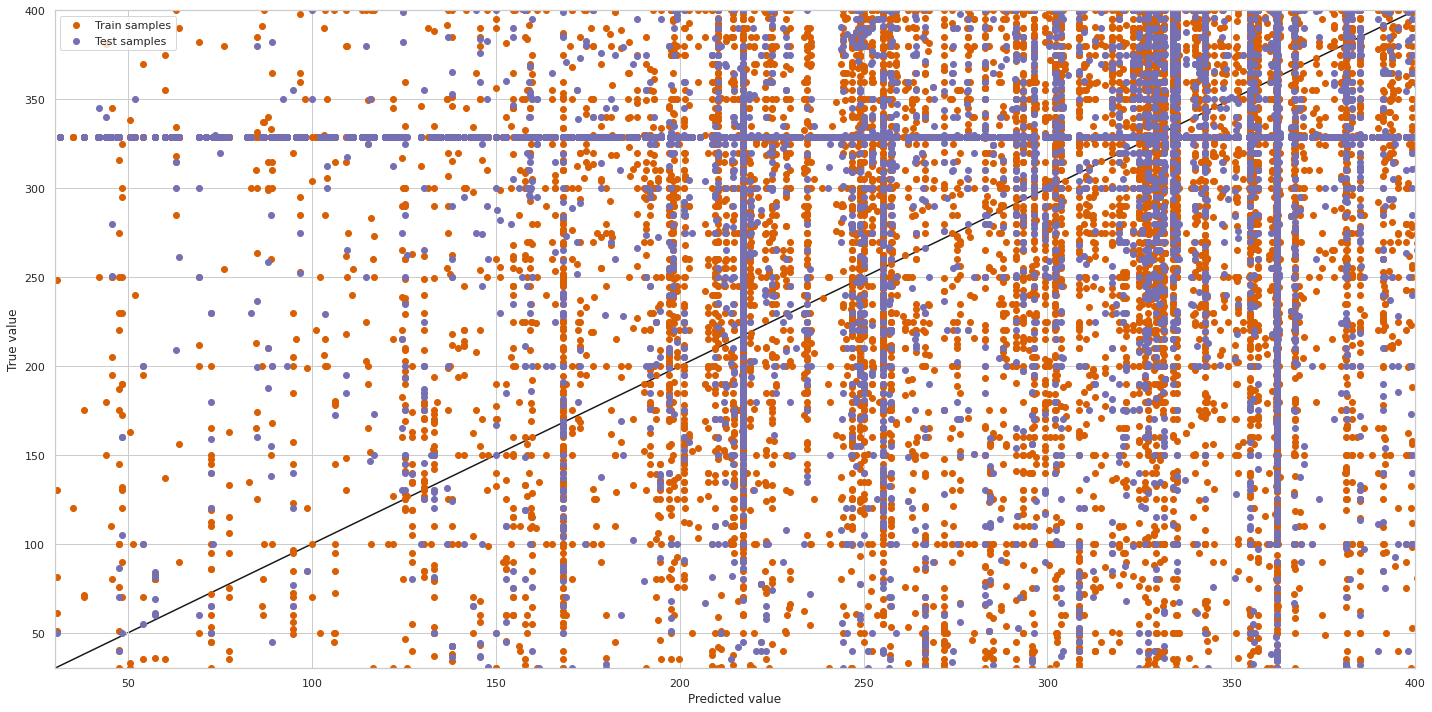

In [ ]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
figsize(8,8)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()